In [1]:
import networkx as nx # 버전 문제좀 해결하기 
import numpy as np
import matplotlib.pyplot as plt
import csv
import requests

In [2]:

# 얘만 쓰기
def read_undirected_graph(file_loc, noise):
  root = terminal = -1 # [이슈 1번] : 왜 Root = Terminal - 1인가?
  
  # To READ from GIST #
  graph_url_loads = requests.get(file_loc).text.splitlines()
  graph_file = csv.reader(graph_url_loads, delimiter=' ')
  G = nx.Graph() # nx 버전 문제 해결해야함
  
  for row in graph_file:
    if row[0] == 'E': # 간선 row[1], row[2]는 Node, row[3]은 their own weight + random noise
      G.add_edge(int(row[1]), int(row[2]), weight=float(row[3])+ np.random.uniform() * noise)
    elif row[0] == 'W': # W는 Node + random noise (prize)
      G.add_node(int(row[1]), weight=float(row[2]) + np.random.uniform()*noise, root=0)
    elif row[0] == 'T': # Termianl Node (Must be connected, weight = 10000 (억수로 크면 됨)) # URL 상에서는 Termianl Node가 없음, 따라서 내가 수정해야함
      G.nodes[int(row[1])]['weight'] = 10000
    elif row[0] == 'R': # Root Node (연산 출발 지점 depth = 0)
      root = int(row[1]) # 코드 상으로는 1번 Node가 Root로 되어있는데, 바꿔서 convergence 봐야함
      G.nodes[root]['root']=1
      
    #Steiner Node는 밑에서 규정해주는가, 아니면 내가 새로 짜야하는지도 봐야함
        
  return root, terminal, G




# 안씀
def read_directed_graph(file_loc, noise):
  root = terminal = -1
  # To READ from GIST #
  graph_url_loads = requests.get(file_loc).text.splitlines()
  graph_file = csv.reader(graph_url_loads, delimiter=' ')
  G = nx.DiGraph()
  for row in graph_file:
    if row[0] == 'D':
      G.add_edge(int(row[1]), int(row[2]), weight=float(row[3])+ np.random.uniform() * noise)
    elif row[0] == 'W':
      G.add_node(int(row[1]), weight=float(row[2]) + np.random.uniform()*noise, root=0)
    elif row[0] == 'T':
      G.nodes[int(row[1])]['weight'] = 10000
    elif row[0] == 'R':
      root = int(row[1])
      G.nodes[root]['root']=1
        
  return root, terminal, G

In [3]:
url = 'https://gist.githubusercontent.com/tycheyoung/aa658381421811804a350522a9946052/raw/06cba99b3f29cb476fedecbcd1c74bc8e67eb371/example.stp'
# url = 'https://gist.githubusercontent.com/tycheyoung/43980844c9ea0db4b34c224efa367a7b/raw/88eff71fd4b53729b8f8a62c81737f8efcf0a6b1/example1.stp'
# url = 'https://gist.githubusercontent.com/tycheyoung/57207a5fc3743446fc5fa8dc47b123ff/raw/d1aa58794b7bb9e9b14a3fece6a357bb7ef159fc/example2.stp'
root, terminal, graph = read_undirected_graph(url, 0)

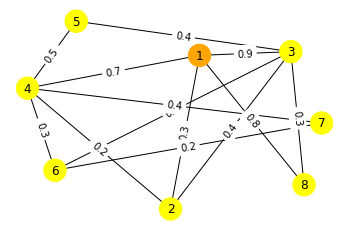

In [224]:
# [이슈 2번]이거 구버전으로 돌리면 괜찮은데, python 버전 문제인지, networkx 버전 문제인지, 충돌일어나서 좀 해결해야할듯.
pos = nx.spring_layout(graph, k = 5/np.sqrt(graph.order())) # https://dustinoprea.com/2015/07/25/using-networkx-to-plot-graphs/
edge_labels = { (u,v): d['weight'] for u,v,d in graph.edges(data=True) }
nx.draw_networkx(graph,
                 pos,
                 node_size=500,
                 node_color=['orange' if v==1 else 'yellow' for _, v in graph.nodes(data='root')])
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()

In [4]:
# Initial PARAMETER
lbda = 1 # damping
iter_num = 15 # Maximum iteration # Tentative Method 적용 가능성도 생각해봐야함 (이전에 말씀해주셨던거)
rein = 0 # reinforcement parameter: gamma // 이거 안쓰는듯 
neg_inf = -1e10
pos_inf = 1e10
depth = 5 #(이슈 3번 : Max Search Depth = 5라는 소리인지, 아니면 다른 의미인지 봐야함)

In [5]:
node_num = graph.number_of_nodes()
adj_matrix = nx.to_numpy_matrix(graph,nodelist=np.arange(1,node_num+1))
adj_bool = (adj_matrix == 0) # 0있는 자리가 True
ind = np.arange(0, node_num)
adj_bool_3d = [adj_bool]*depth

In [23]:
for i in range(10):
    test = np.random.uniform() * 1
    print(test)

0.7288441008403219
0.9291495598092163
0.4291134363329189
0.29900300124907164
0.6897376810916396
0.9890693525973367
0.07165529476264043
0.37019214541278045
0.06036983026072529
0.24836562258325168


In [28]:
# Random UDG
# numNode 
n = 5

maxCount = 3
randomVal = 0
arbi = np.zeros([n,n])
for i in range(n):
    count = 0
    
    for j in range(n):
        if(arbi[i,j] != 0):
            count+=1
    
    for j in range(n):
        if(j == i):
            arbi[i,j] = 0
        elif (count < 3):
            randomVal = np.random.uniform() * 1
            if(randomVal > 0.5):
                edgeWeight = np.random.uniform() * 1 
                #Transpose
                arbi[i,j] = edgeWeight
                arbi[j,i] = edgeWeight
                count+= 1
            elif(arbi[i,j] != 0):
              pass
            
          
        

arbiMat = np.matrix(arbi)
arbiMat


matrix([[0.        , 0.8568028 , 0.78365713, 0.06239933, 0.75239539],
        [0.8568028 , 0.        , 0.        , 0.85886967, 0.13433392],
        [0.78365713, 0.        , 0.        , 0.57996078, 0.56913198],
        [0.06239933, 0.85886967, 0.57996078, 0.        , 0.        ],
        [0.75239539, 0.13433392, 0.56913198, 0.        , 0.        ]])

In [6]:
adj_matrix

matrix([[0. , 0.3, 0.9, 0.7, 0. , 0. , 0. , 0.8],
        [0.3, 0. , 0.4, 0.2, 0. , 0. , 0. , 0. ],
        [0.9, 0.4, 0. , 0. , 0.4, 0.3, 0. , 0.3],
        [0.7, 0.2, 0. , 0. , 0.5, 0.3, 0.4, 0. ],
        [0. , 0. , 0.4, 0.5, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.3, 0.3, 0. , 0. , 0.2, 0. ],
        [0. , 0. , 0. , 0.4, 0. , 0.2, 0. , 0. ],
        [0.8, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ]])

In [7]:
vertex_weight = np.array(list(dict(graph.nodes(data='weight')).values()), dtype=float) # 얘도 따로 봤으면 좋겠는데 출력만 해보기(위 버전 해결했을 때)
adj_matrix = np.ma.array(adj_matrix, mask=(adj_matrix == 0))

In [8]:
vertex_weight

array([1., 1., 1., 1., 1., 1., 1., 1.])

## Message Definition
* $A_{j\rightarrow i} ^d (t+1) = \sum_{k \in N(j) \backslash i }E_{k\rightarrow j}^d(t) + \max_{k \in N(j) \backslash i } (A^{d-1}_{k\rightarrow j}(t)-E^d_{k\rightarrow j}(t)-s_{j\rightarrow k}+\gamma*F_{j\rightarrow k} ^d(t))$
* $B_{j\rightarrow i}(t) = -s_{j*}+\sum_{k \in N(j)\backslash i}D_{k\rightarrow j} +\gamma*G_j$
* $C_{j\rightarrow i} ^d (t+1)=\ -s_{j\rightarrow i}+\sum_{k \in N(j) \backslash i }(E^d_{k\rightarrow j}(t))+\gamma*F_{j\rightarrow i} ^d(t)$
* $D_{j\rightarrow i}(t) = \max(\max_{d}A_{j\rightarrow i}^d(t), B_{j\rightarrow i}(t))$
* $E_{j\rightarrow i} ^d (t+1)= \max (C_{j\rightarrow i}^d(t+1), A_{j\rightarrow i}^d(t+1))$
* $G_{j}(t+1) = -s_{j*}+\sum_{k \in N(j)} D_{k\rightarrow j}(t)+\gamma*G_j(t)$
* $F_{j\rightarrow i}^d (t+1)  = \sum_{k \in N(j)} E_{k\rightarrow j}(t) -s_{j\rightarrow i} - E_{i\rightarrow j}^d(t) +A_{ij}^{d-1}(t)+\gamma*F_{j\rightarrow i} ^d(t) = C_{j\rightarrow i} ^d (t+1) + A_{i\rightarrow j}^{d-1}(t)$

In [ ]:
# Message Initialization
# Assume every messeage matrix is inversed in initial! (except d; j->i)
A = np.ma.array(-np.random.rand(depth, node_num, node_num), mask=adj_bool_3d)
B = np.ma.array(-np.random.rand(node_num, node_num), mask=adj_bool)
C = np.ma.array(np.full((depth, node_num, node_num), neg_inf), mask=adj_bool_3d)
D = np.ma.array(np.maximum(np.amax(A,axis=0), B))

E = np.ma.zeros((depth, node_num, node_num)) # Needs optimization
for d in range(0, depth, 1):
  if d == depth-1:
    E[d,:,:] = np.copy(D)
  else:
    E[d,:,:] = np.maximum(-np.random.rand(node_num, node_num), D)

G = np.zeros(node_num)
F = np.ma.array(np.zeros((depth, node_num, node_num)), mask=adj_bool_3d)

In [ ]:
# ROOT 인덱스에 대해 전처리
B[:,root-1].fill(neg_inf)
A[:,:,root-1].fill(neg_inf)
A[0,:,root-1].fill(0)
E[:,:,root-1].fill(0)
D[:,root-1].fill(0)

In [ ]:
adj_matrix = np.array(adj_matrix.transpose()) ## s_{j->i}
# Variable Definition: A[d,j,i]
sumE = np.ma.array(np.zeros((depth, node_num, node_num)), mask=adj_bool_3d)

In [ ]:
for _ in range(0, iter_num, 1): 
  old_A=np.ma.copy(A)
  
  for d in range(0, depth, 1): # depth zero is root, depth-1 is terminal;
    sumE[d,:,:] = np.ma.array(np.tile(np.sum(E[d,:,:].transpose(),axis=0),(node_num,1)), mask=adj_bool) # k->j
    
    if d == 0:
      cEA = np.ma.array(np.full((node_num, node_num), neg_inf), mask=adj_bool)
    else:
      cEA = old_A[d-1,:,:].transpose()-E[d,:,:].transpose()-adj_matrix+rein*F[d,:,:]
    
    # remove elements that column position is equivalent to maximum position (max within row)
    I = np.argmax(cEA, axis=0)
    Y = cEA[I,ind]
    maxcEA=np.ma.array(np.tile(Y,(node_num,1)), mask=adj_bool)
    cEA[I,ind] = neg_inf
    Y2 = np.max(cEA, axis=0)
    maxcEA[I,ind] = Y2

    sumEp=sumE[d,:,:]-E[d,:,:].transpose()
    A[d,:,:] = sumEp + maxcEA

  A[:,:,root-1].fill(neg_inf)
  A[0,:,root-1].fill(0)

  Dt = D.transpose() # i->j
  sumD_before_tile = np.sum(Dt,axis=0)
  sumD = np.ma.array(np.tile(sumD_before_tile,(node_num, 1)), mask=adj_bool) # k->j
  sumDp = sumD - Dt # k->j
  
  B = -vertex_weight+sumDp+rein*G # vertex_weight & G: broadcast!
  B[:,root-1].fill(neg_inf)
  
  D = np.maximum(np.amax(A,axis=0), B) # D(t+1)
  D[:,root-1].fill(0)
  
  for d in range(depth-1, -1, -1):
    C[d,:,:] = -adj_matrix + sumE[d,:,:]-E[d,:,:].transpose() + rein*F[d,:,:] # C(t+1)
    C[d,:,root-1].fill(neg_inf)
    
    if d == depth-1 or d == 0:
      E[d,:,:] = np.copy(D)
    else:
      E[d,:,:] = np.maximum(C[d+1,:,:], D)  # E(t+1)
    
    if d == 0:
      F[d,:,:].fill(neg_inf)
    else:
      F[d,:,:] = C[d,:,:] + old_A[d-1,:,:].transpose()
  E[:,:,root-1].fill(0)
  F[:,:,root-1].fill(0)

  # reduce
  m = np.maximum(np.amax(A,axis=0),np.amax(E,axis=0))
  m = np.maximum(m,B)
  m = np.maximum(m,D)
  D -= m
  B -= m
  A -= m # depth-wise
  E -= m # depth-wise
  
  G = -vertex_weight + sumD_before_tile + rein*G # s_{c,null}
  G[root-1] = 0
  
  D[:,root-1].fill(0)
  B[:,root-1].fill(neg_inf)
  A[:,:,root-1].fill(neg_inf)
  A[0,:,root-1].fill(0)
  E[:,:,root-1].fill(0)
  # CHALLENGE: node weight-> varies by depth

In [ ]:
# marginal
dF=np.amax(F,axis=0)  #maximum depth-wise; j->i
maxtot=np.max(dF,axis=0)  #maximum F; any node that pointing i
maxtot=np.tile(maxtot, (node_num,1))
maxtoedge=np.argmax(dF,axis=0)

alive_edge = (maxtot > np.tile(G[:,None],(1, node_num))) #G의 각 row는 모두 동일-> column 추출
alive_edge[root-1] = False
alive_edge = (alive_edge) & ~(adj_bool)

rows, cols = np.where(alive_edge==True)
acceptable_edges = [(x, y) for x, y in zip(rows+1, cols+1)]

In [ ]:
eligible_edges = [(x, y) for x, y in zip(ind+1, maxtoedge+1)]
eligible_edges.pop(root-1) # (root-1) position in maxtoedge should be blocked!
tree_edges = list(set(eligible_edges).intersection(acceptable_edges))

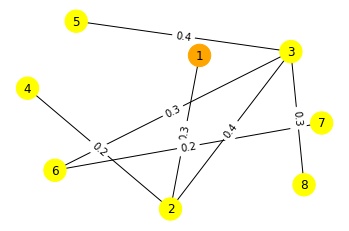

In [235]:
# 원래 그래프의 subgraph인 H 그리기
H = graph.edge_subgraph(tree_edges)
H_edge_labels = { (u,v): d['weight'] for u,v,d in H.edges(data=True) }
nx.draw_networkx(H,
                 pos,
                 node_size=500,
                 node_color=['orange' if v==1 else 'yellow' for _, v in graph.nodes(data='root')])
nx.draw_networkx_edge_labels(H, pos, edge_labels = H_edge_labels)
plt.axis('off')
plt.show()

In [236]:
print(nx.is_tree(H)) # 결과가 트리인지 검사
print(H.size(weight='weight'))  # 결과의 cost 계산

True
2.1


In [238]:
print(G)

[0.0 -1.4 -1.6 -1.2 -1.0 -1.3 -1.2 -1.1]
